# 🔤 Conceitos Básicos de Imagem Digital

## 📖 Visão Geral

Este notebook introduz os **conceitos fundamentais** de processamento de imagens digitais. Aqui construiremos a base teórica e prática necessária para compreender como imagens são representadas e manipuladas computacionalmente.

### 🎯 **Objetivos de Aprendizado:**
- Compreender o que é uma **imagem digital**
- Dominar os conceitos de **amostragem** e **quantização**
- Entender a representação de imagens como **arrays NumPy**
- Manipular **shapes**, **dtypes** e propriedades básicas
- Criar e modificar imagens programaticamente
- Preparar-se para tópicos avançados

### 🧪 **Experimentos Incluídos:**
- Criação de imagens sintéticas
- Manipulação de arrays NumPy
- Análise de propriedades de imagens
- Visualização com Matplotlib
- Introdução aos formatos de dados

---

### 📚 **Sequência de Aprendizado:**
1. **Este notebook (01)**: Conceitos básicos e fundamentos
2. **Notebook 02**: Espaços de cor (RGB, HSV, YCbCr, Lab)
3. **Notebook 03**: Operações pontuais (brilho, contraste, gama)
4. **Próximos**: Histogramas, filtragem, segmentação...

---

In [1]:
# 📦 Setup e Importações
import sys
import os

# --- Diagnóstico e Configuração do Path ---
print(f"Diretório de trabalho atual (onde o notebook está): {os.getcwd()}")

# Pega o diretório de trabalho atual (a pasta 'notebooks/')
notebook_dir = os.getcwd()

# Sobe um nível para chegar à raiz do projeto ('estudos_cv/')
project_root = os.path.abspath(os.path.join(notebook_dir, '../..'))

print(f"Raiz do projeto calculada: {project_root}")
print("-" * 20)
print("Conteúdo encontrado na raiz do projeto:")
try:
    print(os.listdir(project_root))
except FileNotFoundError:
    print("ERRO: O caminho da raiz do projeto não foi encontrado!")
print("-" * 20)

# Adiciona a raiz do projeto ao caminho do Python se ainda não estiver lá
if project_root not in sys.path:
    sys.path.insert(0, project_root)  # Usando insert(0,...) para dar prioridade

print("Caminhos de busca do Python (sys.path):")
for i, path in enumerate(sys.path[:3]):  # Mostra apenas os 3 primeiros
    print(f"  {i}: {path}")
print("  ... (outros caminhos)")
print("-" * 20)

# --- Importações Principais ---
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# --- Tentativa de Importação da Nossa Biblioteca ---
try:
    from cv_lib import processamento
    print("\n✅ SUCESSO! Módulo 'cv_lib.processamento' importado corretamente.")
except ModuleNotFoundError as e:
    print(f"\n❌ FALHA: Ainda não foi possível importar. Erro: {e}")
    print("Verifique se o arquivo cv_lib/processamento.py existe.")

print("\n🔤 Notebook de Conceitos Básicos configurado e pronto!")
print("=" * 50)

Diretório de trabalho atual (onde o notebook está): e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv\notebooks\01 - Fundamentos de Processamento de Imagens
Raiz do projeto calculada: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv
--------------------
Conteúdo encontrado na raiz do projeto:
['.claude', '.git', '.ipynb_checkpoints', '.vscode', 'assets', 'CLAUDE.md', 'cv_lib', 'notebooks', 'README.md', 'tests', 'utils']
--------------------
Caminhos de busca do Python (sys.path):
  0: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv
  1: c:\Users\dronc\anaconda3\envs\estudos_cv\python310.zip
  2: c:\Users\dronc\anaconda3\envs\estudos_cv\DLLs
  ... (outros caminhos)
--------------------

✅ SUCESSO! Módulo 'cv_lib.processamento' importado corretamente.

🔤 Notebook de Conceitos Básicos configurado e pronto!


## 1.1 O que é uma Imagem Digital?

Uma imagem, para um computador, não é uma cena contínua, mas sim uma **grade de números**. O processo de converter uma cena do mundo real para essa grade digital envolve dois conceitos-chave: **Amostragem** e **Quantização**.

### 🔲 **Amostragem (Sampling)**
É a discretização do **espaço**. Nós dividimos a imagem em uma grade, e cada célula dessa grade é um **pixel** (picture element). A densidade da grade define a **resolução** da imagem.

**No código `np.zeros((200, 300), ...)`:**
- `(200, 300)` representa a **amostragem**
- Estamos criando uma grade de **200 pixels de altura** por **300 de largura**
- Total: **60.000 pixels**

### 🎚️ **Quantização (Quantization)**
É a discretização da **intensidade**. Para cada pixel, atribuímos um valor numérico que representa seu brilho ou cor. O padrão mais comum é usar **8 bits**, o que nos dá **256 níveis** (de 0 a 255).

**No código `..., dtype=np.uint8)`:**
- `dtype=np.uint8` (inteiro de 8 bits sem sinal) representa a **quantização**
- Cada pixel pode ter um valor entre **0** (preto) e **255** (branco)
- **uint8** = unsigned integer 8-bit = [0, 255]

### 🎯 **Analogia Útil:**
Imagine uma **planilha Excel**:
- **Linhas e colunas** = amostragem (grade de pixels)
- **Números em cada célula** = quantização (intensidade do pixel)
- **Tamanho da planilha** = resolução da imagem

🎨 Criando uma imagem sintética do zero...
Imagem criada: shape (200, 300), dtype uint8
Valores iniciais: min=0, max=0

🔧 Adicionando elementos gráficos...


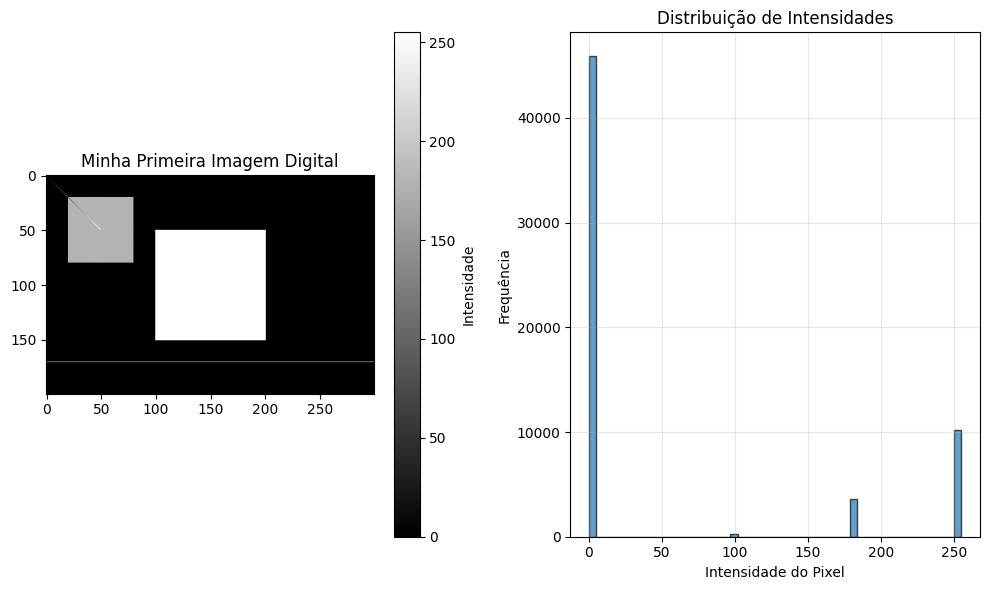


📊 Análise da Imagem Criada:
Dimensões da imagem (altura, largura): (200, 300)
Tipo de dados dos pixels: uint8
Número total de pixels: 60,000
Valor mínimo de pixel: 0
Valor máximo de pixel: 255
Valor médio: 54.7
Desvio padrão: 100.3
Memória ocupada: 60,000 bytes (~58.6 KB)

🔍 Valores de Pixels Específicos:
Pixel (0, 0) - canto superior esquerdo: 0
Pixel (100, 150) - centro aproximado: 255
Pixel (25, 25) - área cinza: 125
Pixel (170, 200) - linha horizontal: 100


In [2]:
# 🔬 EXPERIMENTO: Criando Nossa Primeira Imagem Digital

print("🎨 Criando uma imagem sintética do zero...")

# Vamos criar uma imagem simples do zero usando NumPy
# Uma imagem preta de 200x300 pixels
# O tipo de dado 'np.uint8' é importante (inteiro de 8 bits sem sinal, 0-255)
imagem_teste = np.zeros((200, 300), dtype=np.uint8)

print(f"Imagem criada: shape {imagem_teste.shape}, dtype {imagem_teste.dtype}")
print(f"Valores iniciais: min={imagem_teste.min()}, max={imagem_teste.max()}")

# Vamos adicionar algumas formas geométricas
print("\n🔧 Adicionando elementos gráficos...")

# 1. Retângulo branco no centro
imagem_teste[50:151, 100:201] = 255  # y de 50 a 150, x de 100 a 200

# 2. Retângulo cinza claro no canto superior esquerdo
imagem_teste[20:80, 20:80] = 180

# 3. Linha horizontal cinza escura
imagem_teste[170, :] = 100  # Linha inteira na posição y=170

# 4. Gradiente diagonal
for i in range(50):
    imagem_teste[i, i] = i * 5  # Diagonal com intensidade crescente

# Exibindo a imagem com Matplotlib
plt.figure(figsize=(10, 6))

# Subplot 1: A imagem
plt.subplot(1, 2, 1)
plt.imshow(imagem_teste, cmap="gray")
plt.title("Minha Primeira Imagem Digital")
plt.colorbar(label='Intensidade')

# Subplot 2: Histograma dos valores
plt.subplot(1, 2, 2)
plt.hist(imagem_teste.flatten(), bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.title('Distribuição de Intensidades')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Imprimindo informações sobre nossa imagem
print(f"\n📊 Análise da Imagem Criada:")
print(f"Dimensões da imagem (altura, largura): {imagem_teste.shape}")
print(f"Tipo de dados dos pixels: {imagem_teste.dtype}")
print(f"Número total de pixels: {imagem_teste.size:,}")
print(f"Valor mínimo de pixel: {imagem_teste.min()}")
print(f"Valor máximo de pixel: {imagem_teste.max()}")
print(f"Valor médio: {imagem_teste.mean():.1f}")
print(f"Desvio padrão: {imagem_teste.std():.1f}")
print(f"Memória ocupada: {imagem_teste.nbytes:,} bytes (~{imagem_teste.nbytes/1024:.1f} KB)")

# Verificando alguns pixels específicos
print(f"\n🔍 Valores de Pixels Específicos:")
print(f"Pixel (0, 0) - canto superior esquerdo: {imagem_teste[0, 0]}")
print(f"Pixel (100, 150) - centro aproximado: {imagem_teste[100, 150]}")
print(f"Pixel (25, 25) - área cinza: {imagem_teste[25, 25]}")
print(f"Pixel (170, 200) - linha horizontal: {imagem_teste[170, 200]}")

## 1.2 Representação NumPy - A Base Computacional

No processamento de imagens com Python, usamos **arrays NumPy** para representar imagens. É fundamental entender como esses arrays funcionam.

### 📐 **Shapes (Dimensões) de Imagens:**

#### **Imagem em Escala de Cinza (2D):**
```python
shape = (altura, largura)
# Exemplo: (480, 640) = 480 pixels de altura, 640 de largura
```

#### **Imagem Colorida RGB (3D):**
```python
shape = (altura, largura, canais)
# Exemplo: (480, 640, 3) = 480×640 pixels, 3 canais (R, G, B)
```

### 🔢 **Tipos de Dados (dtypes) Comuns:**

| **dtype** | **Faixa** | **Uso** | **Memória** |
|-----------|-----------|---------|-------------|
| `uint8` | [0, 255] | **Padrão** para imagens | 1 byte/pixel |
| `uint16` | [0, 65535] | Imagens médicas, RAW | 2 bytes/pixel |
| `float32` | [0.0, 1.0] | **Processamento** científico | 4 bytes/pixel |
| `float64` | [0.0, 1.0] | **Cálculos** de precisão | 8 bytes/pixel |

### ⚡ **Por que uint8 é o Padrão?**
- **Eficiência**: 1 byte por pixel
- **Compatibilidade**: Suportado por todos os formatos
- **Suficiente**: 256 níveis cobrem bem a percepção humana
- **Hardware**: Otimizado para GPUs e displays

🔢 Demonstração de Tipos de Dados e Shapes

📊 Comparação de Tipos de Dados:
Tipo     | Shape        | Range           | Memória  | Tamanho   
----------------------------------------------------------------------
uint8    | (100, 150)   | [0.0, 255.0]    |   14.6 KB | 15,000
uint16   | (100, 150)   | [4.0, 65535.0]  |   29.3 KB | 15,000
float32  | (100, 150)   | [0.0, 1.0]      |   58.6 KB | 15,000
float64  | (100, 150)   | [0.0, 1.0]      |  117.2 KB | 15,000
RGB      | (100, 150, 3) | [0, 255]        |   43.9 KB | 45,000

🎨 Visualização dos Diferentes Tipos:


C:\Users\dronc\AppData\Local\Temp\ipykernel_103908\4235756843.py:52: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\dronc\anaconda3\envs\estudos_cv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


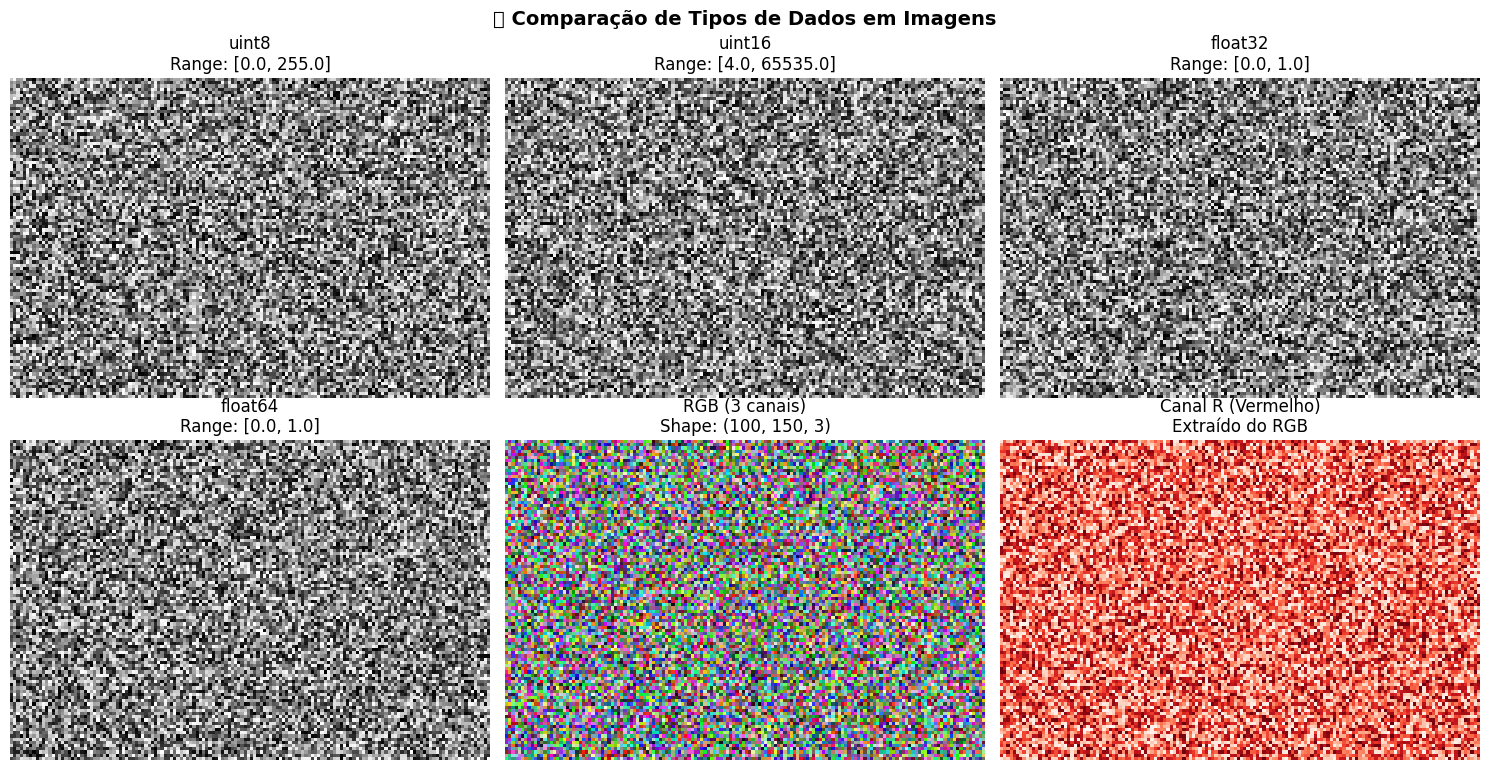


🔍 Operações Básicas com Arrays:
Imagem original: shape (100, 150), dtype uint8
Pixel no canto (0,0): 201
Pixel no centro: 214

Fatia (primeiras 10x10 pixels):
Shape da fatia: (10, 10)
Alguns valores: [201 249 158 162 228]

Após adicionar retângulo branco:
Max na região modificada: 255

💡 Pontos Importantes:
• uint8 é o padrão para a maioria das aplicações
• float32/float64 são usados para cálculos intermediários
• Sempre verificar o dtype antes de operações matemáticas
• RGB adiciona uma terceira dimensão ao array


In [3]:
# 🔬 EXPERIMENTO: Explorando Arrays NumPy para Imagens

print("🔢 Demonstração de Tipos de Dados e Shapes")

# Criando arrays com diferentes dtypes
imagens_teste = {
    'uint8': np.random.randint(0, 256, (100, 150), dtype=np.uint8),
    'uint16': np.random.randint(0, 65536, (100, 150), dtype=np.uint16),
    'float32': np.random.random((100, 150)).astype(np.float32),
    'float64': np.random.random((100, 150)).astype(np.float64)
}

# Imagem RGB sintética
imagem_rgb = np.random.randint(0, 256, (100, 150, 3), dtype=np.uint8)

print("\n📊 Comparação de Tipos de Dados:")
print("=" * 70)
print(f"{'Tipo':8} | {'Shape':12} | {'Range':15} | {'Memória':8} | {'Tamanho':10}")
print("-" * 70)

for nome, img in imagens_teste.items():
    memoria_kb = img.nbytes / 1024
    range_str = f"[{img.min():.1f}, {img.max():.1f}]"
    print(f"{nome:8} | {str(img.shape):12} | {range_str:15} | {memoria_kb:6.1f} KB | {img.size:,}")

# Informações sobre imagem RGB
print(f"{'RGB':8} | {str(imagem_rgb.shape):12} | [0, 255]        | {imagem_rgb.nbytes/1024:6.1f} KB | {imagem_rgb.size:,}")

print("\n🎨 Visualização dos Diferentes Tipos:")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Visualiza cada tipo de dado
for i, (nome, img) in enumerate(imagens_teste.items()):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'{nome}\nRange: [{img.min():.1f}, {img.max():.1f}]')
    axes[i].axis('off')

# Imagem RGB
axes[4].imshow(imagem_rgb)
axes[4].set_title('RGB (3 canais)\nShape: ' + str(imagem_rgb.shape))
axes[4].axis('off')

# Comparação de canais RGB
canal_r = imagem_rgb[:, :, 0]
axes[5].imshow(canal_r, cmap='Reds')
axes[5].set_title('Canal R (Vermelho)\nExtraído do RGB')
axes[5].axis('off')

plt.suptitle('🔢 Comparação de Tipos de Dados em Imagens', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Operações Básicas com Arrays:")

# Demonstrando operações básicas
img_demo = imagens_teste['uint8']

print(f"Imagem original: shape {img_demo.shape}, dtype {img_demo.dtype}")
print(f"Pixel no canto (0,0): {img_demo[0, 0]}")
print(f"Pixel no centro: {img_demo[50, 75]}")

# Acessando fatias (slices)
print(f"\nFatia (primeiras 10x10 pixels):")
fatia = img_demo[:10, :10]
print(f"Shape da fatia: {fatia.shape}")
print(f"Alguns valores: {fatia[0, :5]}")

# Modificando pixels
img_copia = img_demo.copy()
img_copia[40:60, 60:90] = 255  # Retângulo branco
print(f"\nApós adicionar retângulo branco:")
print(f"Max na região modificada: {img_copia[40:60, 60:90].max()}")

print("\n💡 Pontos Importantes:")
print("• uint8 é o padrão para a maioria das aplicações")
print("• float32/float64 são usados para cálculos intermediários")
print("• Sempre verificar o dtype antes de operações matemáticas")
print("• RGB adiciona uma terceira dimensão ao array")

## 1.3 Trabalhando com Imagens Reais

Agora vamos trabalhar com **imagens reais** para entender como os conceitos se aplicam na prática. Utilizaremos imagens de exemplo do `scikit-image`.

### 📸 **Imagens de Exemplo Disponíveis:**
- `data.camera()` - Famoso "Cameraman" (escala de cinza)
- `data.chelsea()` - Gato Chelsea (RGB colorida)
- `data.astronaut()` - Astronauta (RGB colorida)
- `data.coffee()` - Xícara de café (RGB colorida)
- `data.coins()` - Moedas (escala de cinza)

### 🔍 **O que Analisar em uma Imagem:**
1. **Shape**: Dimensões e número de canais
2. **dtype**: Tipo de dado dos pixels
3. **Range**: Valores mínimo e máximo
4. **Estatísticas**: Média, desvio padrão, mediana
5. **Distribuição**: Histograma dos valores
6. **Memória**: Espaço ocupado

📸 Carregando e Analisando Imagens Reais

📊 Propriedades das Imagens de Exemplo:
Nome            | Shape        | Dtype    | Min | Max |  Média |  Memória
--------------------------------------------------------------------------------
Cameraman (P&B) | (512, 512)   | uint8    |   0 | 255 |  129.1 |  256.0 KB
Chelsea (RGB)   | (300, 451, 3) | uint8    |   0 | 231 |  115.3 |  396.4 KB
Astronaut (RGB) | (512, 512, 3) | uint8    |   0 | 255 |  114.6 |  768.0 KB
Moedas (P&B)    | (303, 384)   | uint8    |   1 | 252 |   96.9 |  113.6 KB

🖼️ Visualização das Imagens:


C:\Users\dronc\AppData\Local\Temp\ipykernel_103908\2690128694.py:56: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\dronc\anaconda3\envs\estudos_cv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


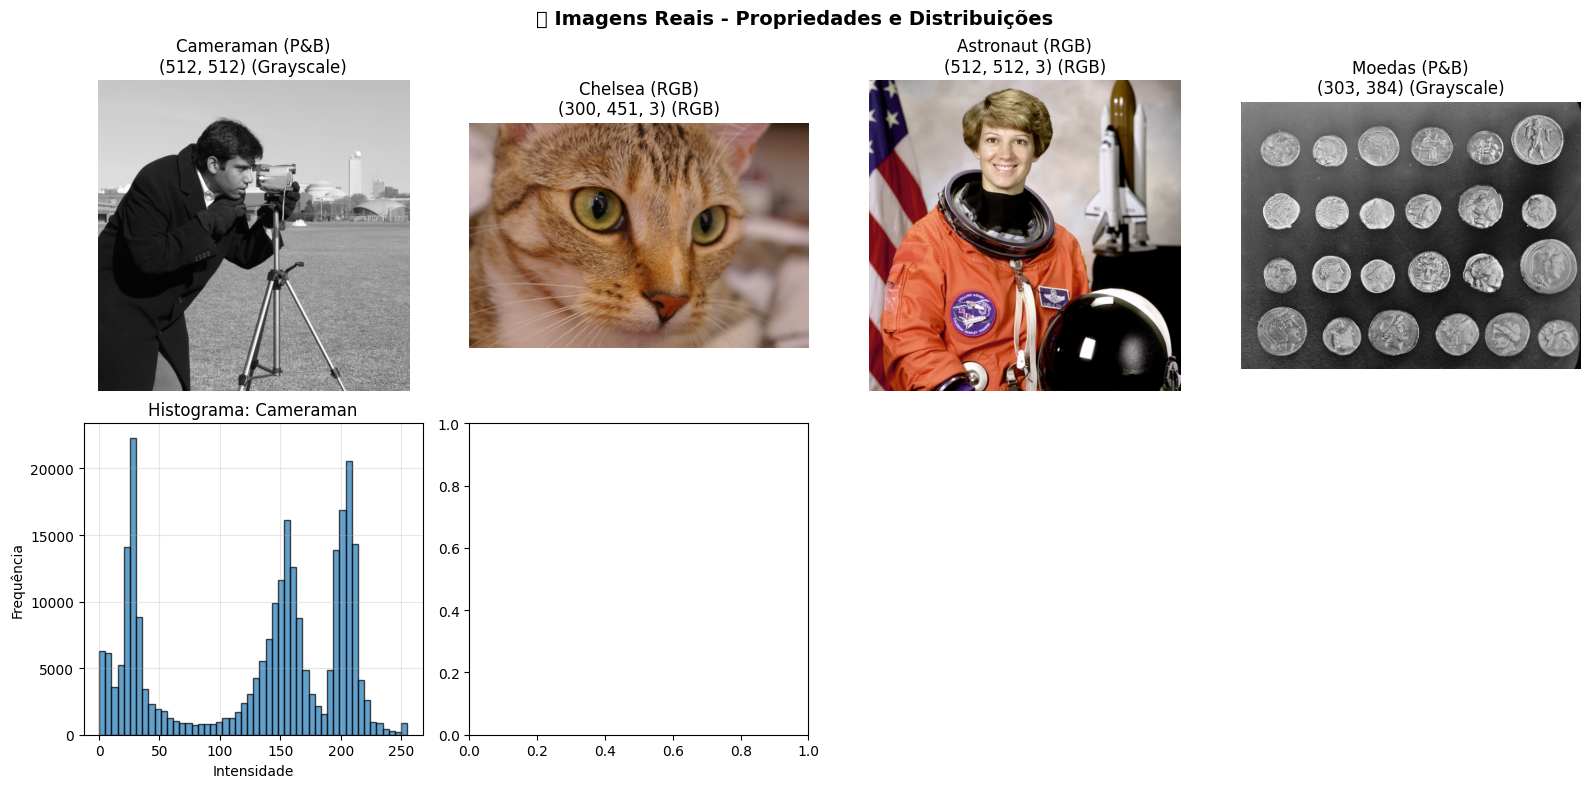


🔍 Análise Detalhada da Imagem RGB (Chelsea):
Shape completo: (300, 451, 3)
Dimensões: 300 altura × 451 largura × 3 canais
Total de elementos: 405,900 números
Total de pixels: 135,300 pixels

🌈 Análise por Canal:
Vermelho (R): min=2, max=215, média=147.7
Verde (G): min=4, max=189, média=111.4
Azul (B): min=0, max=231, média=86.8

🎯 Pixels Específicos (RGB):
Pixel na posição (150, 200): RGB(125, 64, 35)
Interpretação: R=125 (vermelho), G=64 (verde), B=35 (azul)

✅ Conceitos Básicos Dominados!
Próximos passos: Notebook 02 (Espaços de Cor) e 03 (Operações Pontuais)


In [4]:
# 🔬 EXPERIMENTO: Análise Completa de Imagens Reais

print("📸 Carregando e Analisando Imagens Reais")

# Carregando diferentes tipos de imagens
imagens_exemplo = {
    'Cameraman (P&B)': data.camera(),
    'Chelsea (RGB)': data.chelsea(),
    'Astronaut (RGB)': data.astronaut(),
    'Moedas (P&B)': data.coins(),
}

print("\n📊 Propriedades das Imagens de Exemplo:")
print("=" * 80)
print(f"{'Nome':15} | {'Shape':12} | {'Dtype':8} | {'Min':>3} | {'Max':>3} | {'Média':>6} | {'Memória':>8}")
print("-" * 80)

for nome, img in imagens_exemplo.items():
    memoria_kb = img.nbytes / 1024
    print(f"{nome:15} | {str(img.shape):12} | {str(img.dtype):8} | {img.min():3d} | {img.max():3d} | {img.mean():6.1f} | {memoria_kb:6.1f} KB")

# Visualização das imagens
print("\n🖼️ Visualização das Imagens:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, (nome, img) in enumerate(imagens_exemplo.items()):
    # Determina se é colorida ou P&B
    if len(img.shape) == 3:  # RGB
        axes[i].imshow(img)
        tipo = "RGB"
    else:  # Escala de cinza
        axes[i].imshow(img, cmap='gray')
        tipo = "Grayscale"
    
    axes[i].set_title(f'{nome}\n{img.shape} ({tipo})')
    axes[i].axis('off')

# Histogramas das imagens em escala de cinza
for i, (nome, img) in enumerate(imagens_exemplo.items()):
    if len(img.shape) == 2:  # Apenas escala de cinza
        idx = i + 4  # Segunda linha
        if idx < len(axes):
            axes[idx].hist(img.flatten(), bins=50, alpha=0.7, edgecolor='black')
            axes[idx].set_title(f'Histograma: {nome.split(" ")[0]}')
            axes[idx].set_xlabel('Intensidade')
            axes[idx].set_ylabel('Frequência')
            axes[idx].grid(True, alpha=0.3)

# Remove axes extras
for i in range(6, len(axes)):
    axes[i].remove()

plt.suptitle('📸 Imagens Reais - Propriedades e Distribuições', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análise detalhada de uma imagem RGB
print("\n🔍 Análise Detalhada da Imagem RGB (Chelsea):")
chelsea = imagens_exemplo['Chelsea (RGB)']

print(f"Shape completo: {chelsea.shape}")
print(f"Dimensões: {chelsea.shape[0]} altura × {chelsea.shape[1]} largura × {chelsea.shape[2]} canais")
print(f"Total de elementos: {chelsea.size:,} números")
print(f"Total de pixels: {chelsea.shape[0] * chelsea.shape[1]:,} pixels")

# Analisando cada canal separadamente
print(f"\n🌈 Análise por Canal:")
canais = ['Vermelho (R)', 'Verde (G)', 'Azul (B)']
for i, canal in enumerate(canais):
    canal_data = chelsea[:, :, i]
    print(f"{canal}: min={canal_data.min()}, max={canal_data.max()}, média={canal_data.mean():.1f}")

# Exemplo de acesso a pixels específicos
print(f"\n🎯 Pixels Específicos (RGB):")
y, x = 150, 200  # Coordenadas de exemplo
pixel_rgb = chelsea[y, x]
print(f"Pixel na posição ({y}, {x}): RGB({pixel_rgb[0]}, {pixel_rgb[1]}, {pixel_rgb[2]})")
print(f"Interpretação: R={pixel_rgb[0]} (vermelho), G={pixel_rgb[1]} (verde), B={pixel_rgb[2]} (azul)")

print("\n✅ Conceitos Básicos Dominados!")
print("Próximos passos: Notebook 02 (Espaços de Cor) e 03 (Operações Pontuais)")

## 🎓 Resumo: Fundamentos Consolidados

### ✅ **O que Aprendemos:**

#### 🔤 **1. Conceito de Imagem Digital**
- **Amostragem**: Discretização do espaço (grade de pixels)
- **Quantização**: Discretização da intensidade (valores 0-255)
- **Pixel**: Menor elemento da imagem (picture element)
- **Resolução**: Densidade de pixels (altura × largura)

#### 🔢 **2. Representação NumPy**
- **Shape 2D**: `(altura, largura)` para escala de cinza
- **Shape 3D**: `(altura, largura, canais)` para RGB
- **dtype uint8**: Padrão [0, 255] (1 byte/pixel)
- **dtype float**: Para cálculos [0.0, 1.0]

#### 📸 **3. Manipulação Prática**
- **Criação**: `np.zeros()`, `np.ones()`, `np.random()`
- **Acesso**: `img[y, x]` para pixel, `img[y1:y2, x1:x2]` para região
- **Modificação**: Atribuição direta de valores
- **Visualização**: `plt.imshow()` com colormap apropriado

---

### 🎯 **Conceitos-Chave Dominados:**

| **Conceito** | **Significado** | **Aplicação** |
|--------------|-----------------|---------------|
| **Pixel** | Menor elemento da imagem | Unidade básica de processamento |
| **Shape** | Dimensões do array | Define estrutura da imagem |
| **dtype** | Tipo de dados | Determina range e precisão |
| **Range** | Faixa de valores | [0,255] para uint8, [0.0,1.0] para float |
| **Channels** | Canais de cor | 1 para P&B, 3 para RGB |

---

### 📚 **Sequência de Aprendizado:**

✅ **Você está aqui**: Conceitos básicos dominados!  
➡️ **Próximo**: [02-Espacos_de_Cor.ipynb] - RGB, HSV, YCbCr, Lab  
➡️ **Depois**: [03-Operacoes_Pontuais.ipynb] - Brilho, contraste, gama  
➡️ **Futuro**: Histogramas, filtragem, segmentação...

### 💡 **Dicas Importantes:**
- **Sempre verificar shape e dtype** antes de processar
- **uint8 para armazenamento, float para cálculos**
- **Coordenadas são (y, x)** - linha primeiro, coluna depois
- **Valores fora do range causam clipping ou overflow**

---

*🔤 **Fundamentos concluídos!** Você agora tem a base sólida para explorar processamento de imagens avançado.*